In [1]:
import cellphonedb
cellphonedb.version

'5.0.1'

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ad = sc.read_h5ad('/home/data/sdzl14/NSCLC/SDB/data/20_build_atlas/annotate_datasets/35_final_atlas/artifacts/full_atlas_annotated.h5ad')

In [3]:
ad = ad.copy()

In [8]:
ad.obs['origin_fine']

001C_AAACCTGCATCGGGTC-0           normal
001C_AAACCTGTCAACACCA-0           normal
001C_AAACGGGAGACTAAGT-0           normal
001C_AAACGGGAGGCTCATT-0           normal
001C_AAACGGGAGGGAACGG-0           normal
                               ...      
bcBOGU_25-21               tumor_primary
bcHDOT_25-21               tumor_primary
bcIFTF_25-21               tumor_primary
bcBDLT_25-21               tumor_primary
bcBNMZ_25-21               tumor_primary
Name: origin_fine, Length: 892296, dtype: category
Categories (8, object): ['effusion', 'nan', 'normal', 'normal_adjacent', 'tumor_edge', 'tumor_metastasis', 'tumor_middle', 'tumor_primary']

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


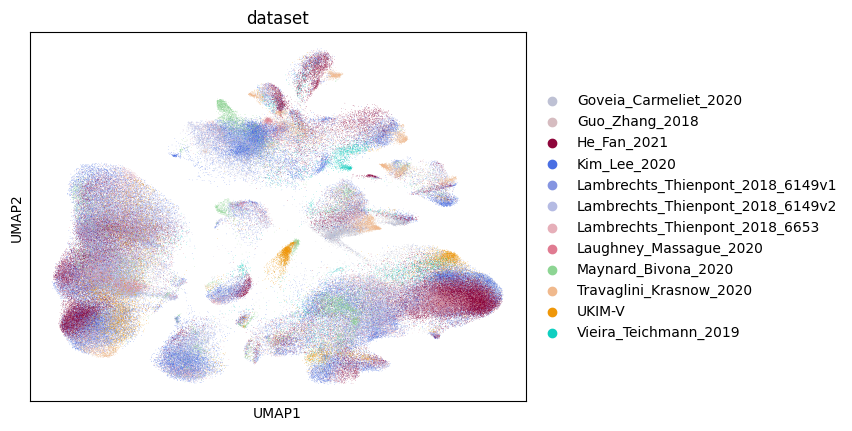

In [29]:
sc.pl.umap(metas,color=['dataset'])

In [28]:

metas = ad[ad.obs['origin_fine'].isin([ 'normal_adjacent', 'tumor_edge', 'tumor_metastasis', 'tumor_middle'])]
metas

View of AnnData object with n_obs × n_vars = 227364 × 17837
    obs: 'sample', 'uicc_stage', 'sex', 'ever_smoker', 'driver_genes', 'condition', 'age', 'patient', 'tissue', 'origin', 'dataset', 'cell_type', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'cell_type_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'platform_fine', 'cell_type_major'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '_scvi', 'cell_type_coarse_colors', 'cell_type_major_colors', 'cell_type_predicted_colors', 'condition_colors', 'dataset_colors', 'doublet_status_colors', 'ever_smoker_colors', 'hvg', 'leiden_colors', 'neighbors', 'origin_colors', 'platform_colors', 'sex_colors', 'tumor_stage_colors', 'uicc_stage_c

In [19]:
goveia = metas[metas.obs['dataset'] == 'Goveia_Carmeliet_2020']
goveia

View of AnnData object with n_obs × n_vars = 15182 × 17837
    obs: 'sample', 'uicc_stage', 'sex', 'ever_smoker', 'driver_genes', 'condition', 'age', 'patient', 'tissue', 'origin', 'dataset', 'cell_type', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'cell_type_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'platform_fine', 'cell_type_major'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '_scvi', 'cell_type_coarse_colors', 'cell_type_major_colors', 'cell_type_predicted_colors', 'condition_colors', 'dataset_colors', 'doublet_status_colors', 'ever_smoker_colors', 'hvg', 'leiden_colors', 'neighbors', 'origin_colors', 'platform_colors', 'sex_colors', 'tumor_stage_colors', 'uicc_stage_co

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


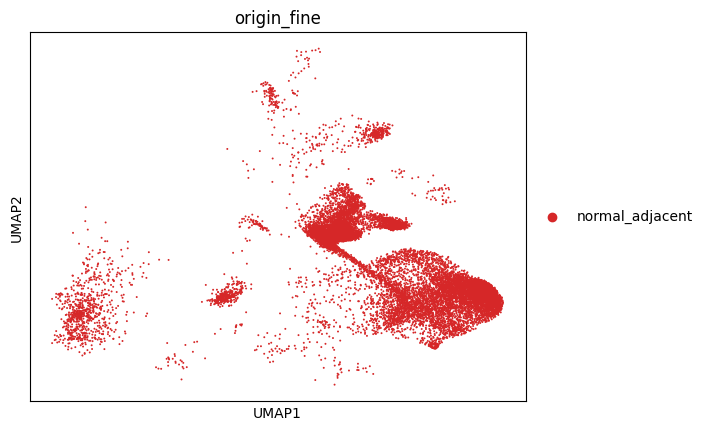

In [20]:
sc.pl.umap(goveia,color=['origin_fine'])

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


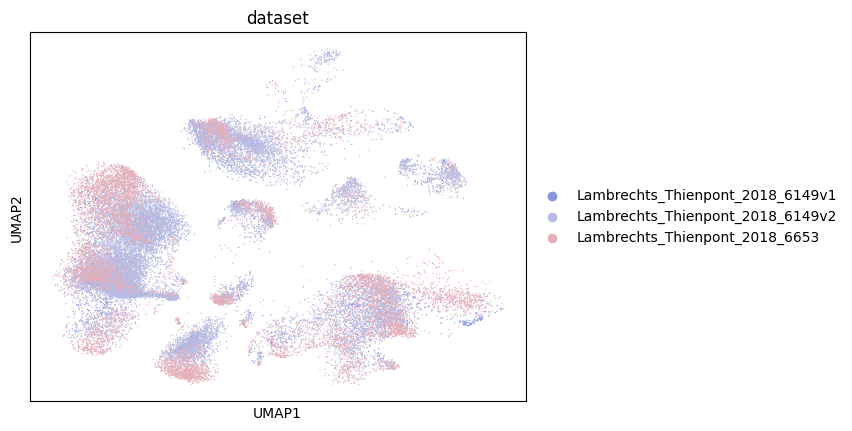

In [27]:
sc.pl.umap(metas,color=['dataset'])

In [8]:
sc.tl.pca(ad)

In [15]:
ad.obs['patient']

001C_AAACCTGCATCGGGTC-0         Adams_Kaminski_2020_001C
001C_AAACCTGTCAACACCA-0         Adams_Kaminski_2020_001C
001C_AAACGGGAGACTAAGT-0         Adams_Kaminski_2020_001C
001C_AAACGGGAGGCTCATT-0         Adams_Kaminski_2020_001C
001C_AAACGGGAGGGAACGG-0         Adams_Kaminski_2020_001C
                                       ...              
bcBOGU_25-21               Zilionis_Klein_2019_patient_3
bcHDOT_25-21               Zilionis_Klein_2019_patient_3
bcIFTF_25-21               Zilionis_Klein_2019_patient_3
bcBDLT_25-21               Zilionis_Klein_2019_patient_3
bcBNMZ_25-21               Zilionis_Klein_2019_patient_3
Name: patient, Length: 892296, dtype: category
Categories (298, object): ['Adams_Kaminski_2020_001C', 'Adams_Kaminski_2020_002C', 'Adams_Kaminski_2020_003C', 'Adams_Kaminski_2020_8CO', ..., 'Zilionis_Klein_2019_patient_4', 'Zilionis_Klein_2019_patient_5', 'Zilionis_Klein_2019_patient_6', 'Zilionis_Klein_2019_patient_7']

In [18]:
metas.obs['patient']

AAACCTGAGAGCTATA.2.NEC-2    Goveia_Carmeliet_2020_patient_40
AAACCTGAGGACCACA.2.NEC-2    Goveia_Carmeliet_2020_patient_40
AAACCTGAGGCCGAAT.2.NEC-2    Goveia_Carmeliet_2020_patient_40
AAACCTGAGTTAAGTG.2.NEC-2    Goveia_Carmeliet_2020_patient_40
AAACCTGCATCACAAC.2.NEC-2    Goveia_Carmeliet_2020_patient_40
                                          ...               
ASK454_TGAATTGTGCGC-19       Vieira_Teichmann_2019_Dropseq_4
ASK454_CCAACGTTTAAG-19       Vieira_Teichmann_2019_Dropseq_4
ASK454_ACGACGACGAAG-19       Vieira_Teichmann_2019_Dropseq_4
ASK454_GAGCGCTCCCTA-19       Vieira_Teichmann_2019_Dropseq_4
ASK454_GCAGTTATGTCG-19       Vieira_Teichmann_2019_Dropseq_4
Name: patient, Length: 227364, dtype: category
Categories (93, object): ['Goveia_Carmeliet_2020_patient_40', 'Goveia_Carmeliet_2020_patient_41', 'Goveia_Carmeliet_2020_patient_42', 'Goveia_Carmeliet_2020_patient_45', ..., 'Vieira_Teichmann_2019_Dropseq_1', 'Vieira_Teichmann_2019_Dropseq_2', 'Vieira_Teichmann_2019_Dropseq_3', 'V

In [8]:
ad.obs['cell_type']

001C_AAACCTGCATCGGGTC-0        Monocyte non-classical
001C_AAACCTGTCAACACCA-0           Macrophage alveolar
001C_AAACGGGAGACTAAGT-0    Endothelial cell lymphatic
001C_AAACGGGAGGCTCATT-0                    Macrophage
001C_AAACGGGAGGGAACGG-0            Monocyte classical
                                      ...            
bcBOGU_25-21                               T cell CD4
bcHDOT_25-21                              Tumor cells
bcIFTF_25-21                                   B cell
bcBDLT_25-21                     T cell CD8 activated
bcBNMZ_25-21                                Mast cell
Name: cell_type, Length: 892296, dtype: category
Categories (44, object): ['Alveolar cell type 1', 'Alveolar cell type 2', 'B cell', 'B cell dividing', ..., 'myeloid dividing', 'pDC', 'stromal dividing', 'transitional club/AT2']

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


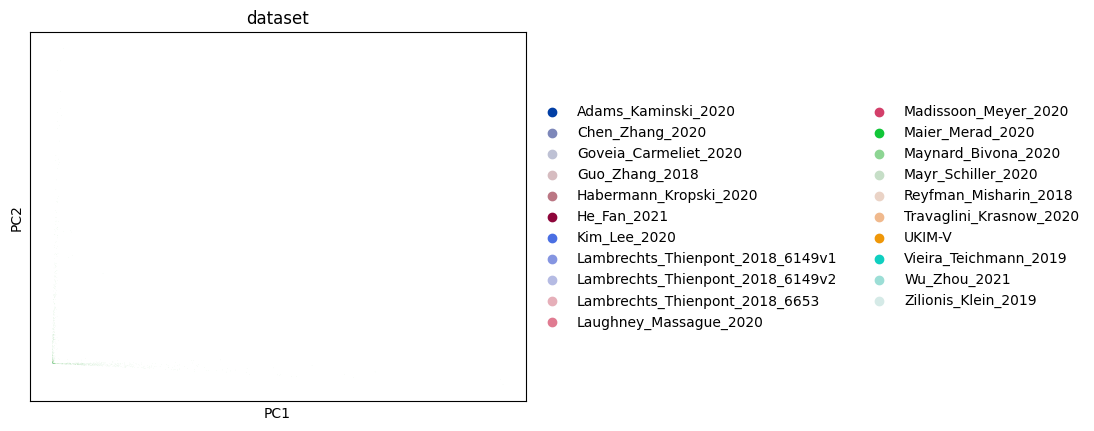

<Figure size 640x480 with 0 Axes>

In [11]:
sc.pl.pca(ad, color=['dataset'])
plt.savefig('/home/data/sdzl14/NSCLC/pdf/20250107sdb/总PCA.png',dpi = 300, bbox_inches='tight')

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


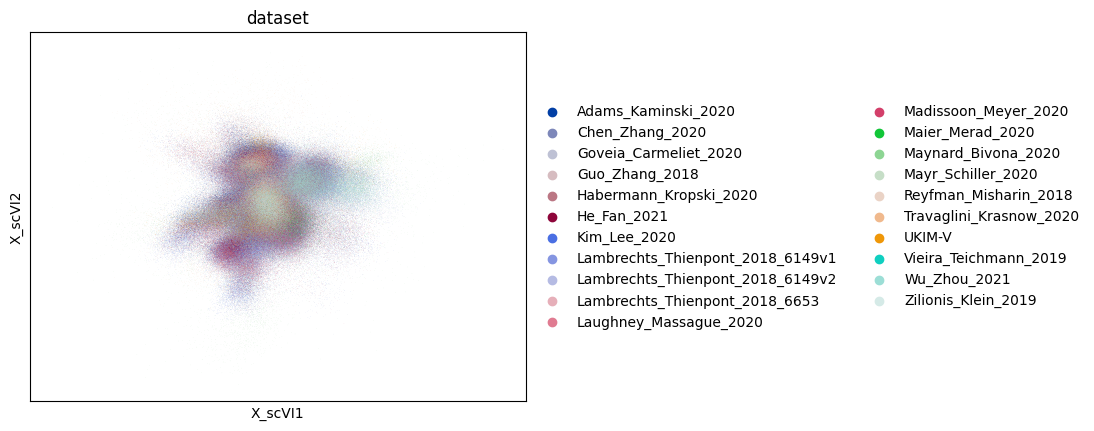

In [15]:
sc.pl.embedding(
    ad,
    basis="X_scVI",
    color=["dataset"],
    ncols=1,
)

/home/data/sdzl14/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


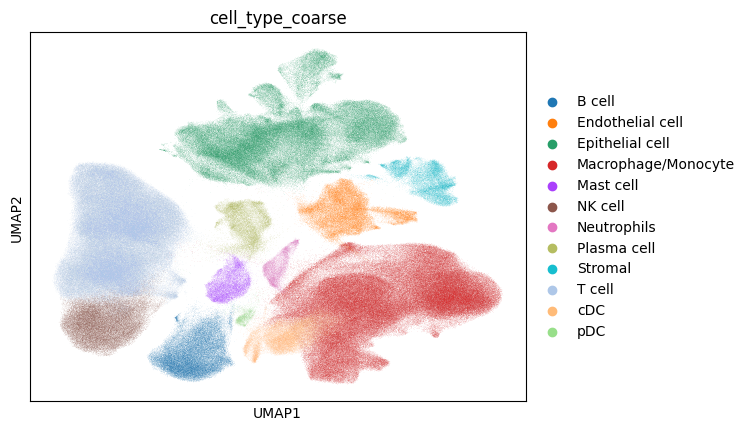

In [17]:
sc.pl.umap(ad,color=['cell_type_coarse'])

In [18]:
ad = sc.read_h5ad('/home/data/sdzl14/NSCLC/pdf/20250107sdb/tumor.h5ad')

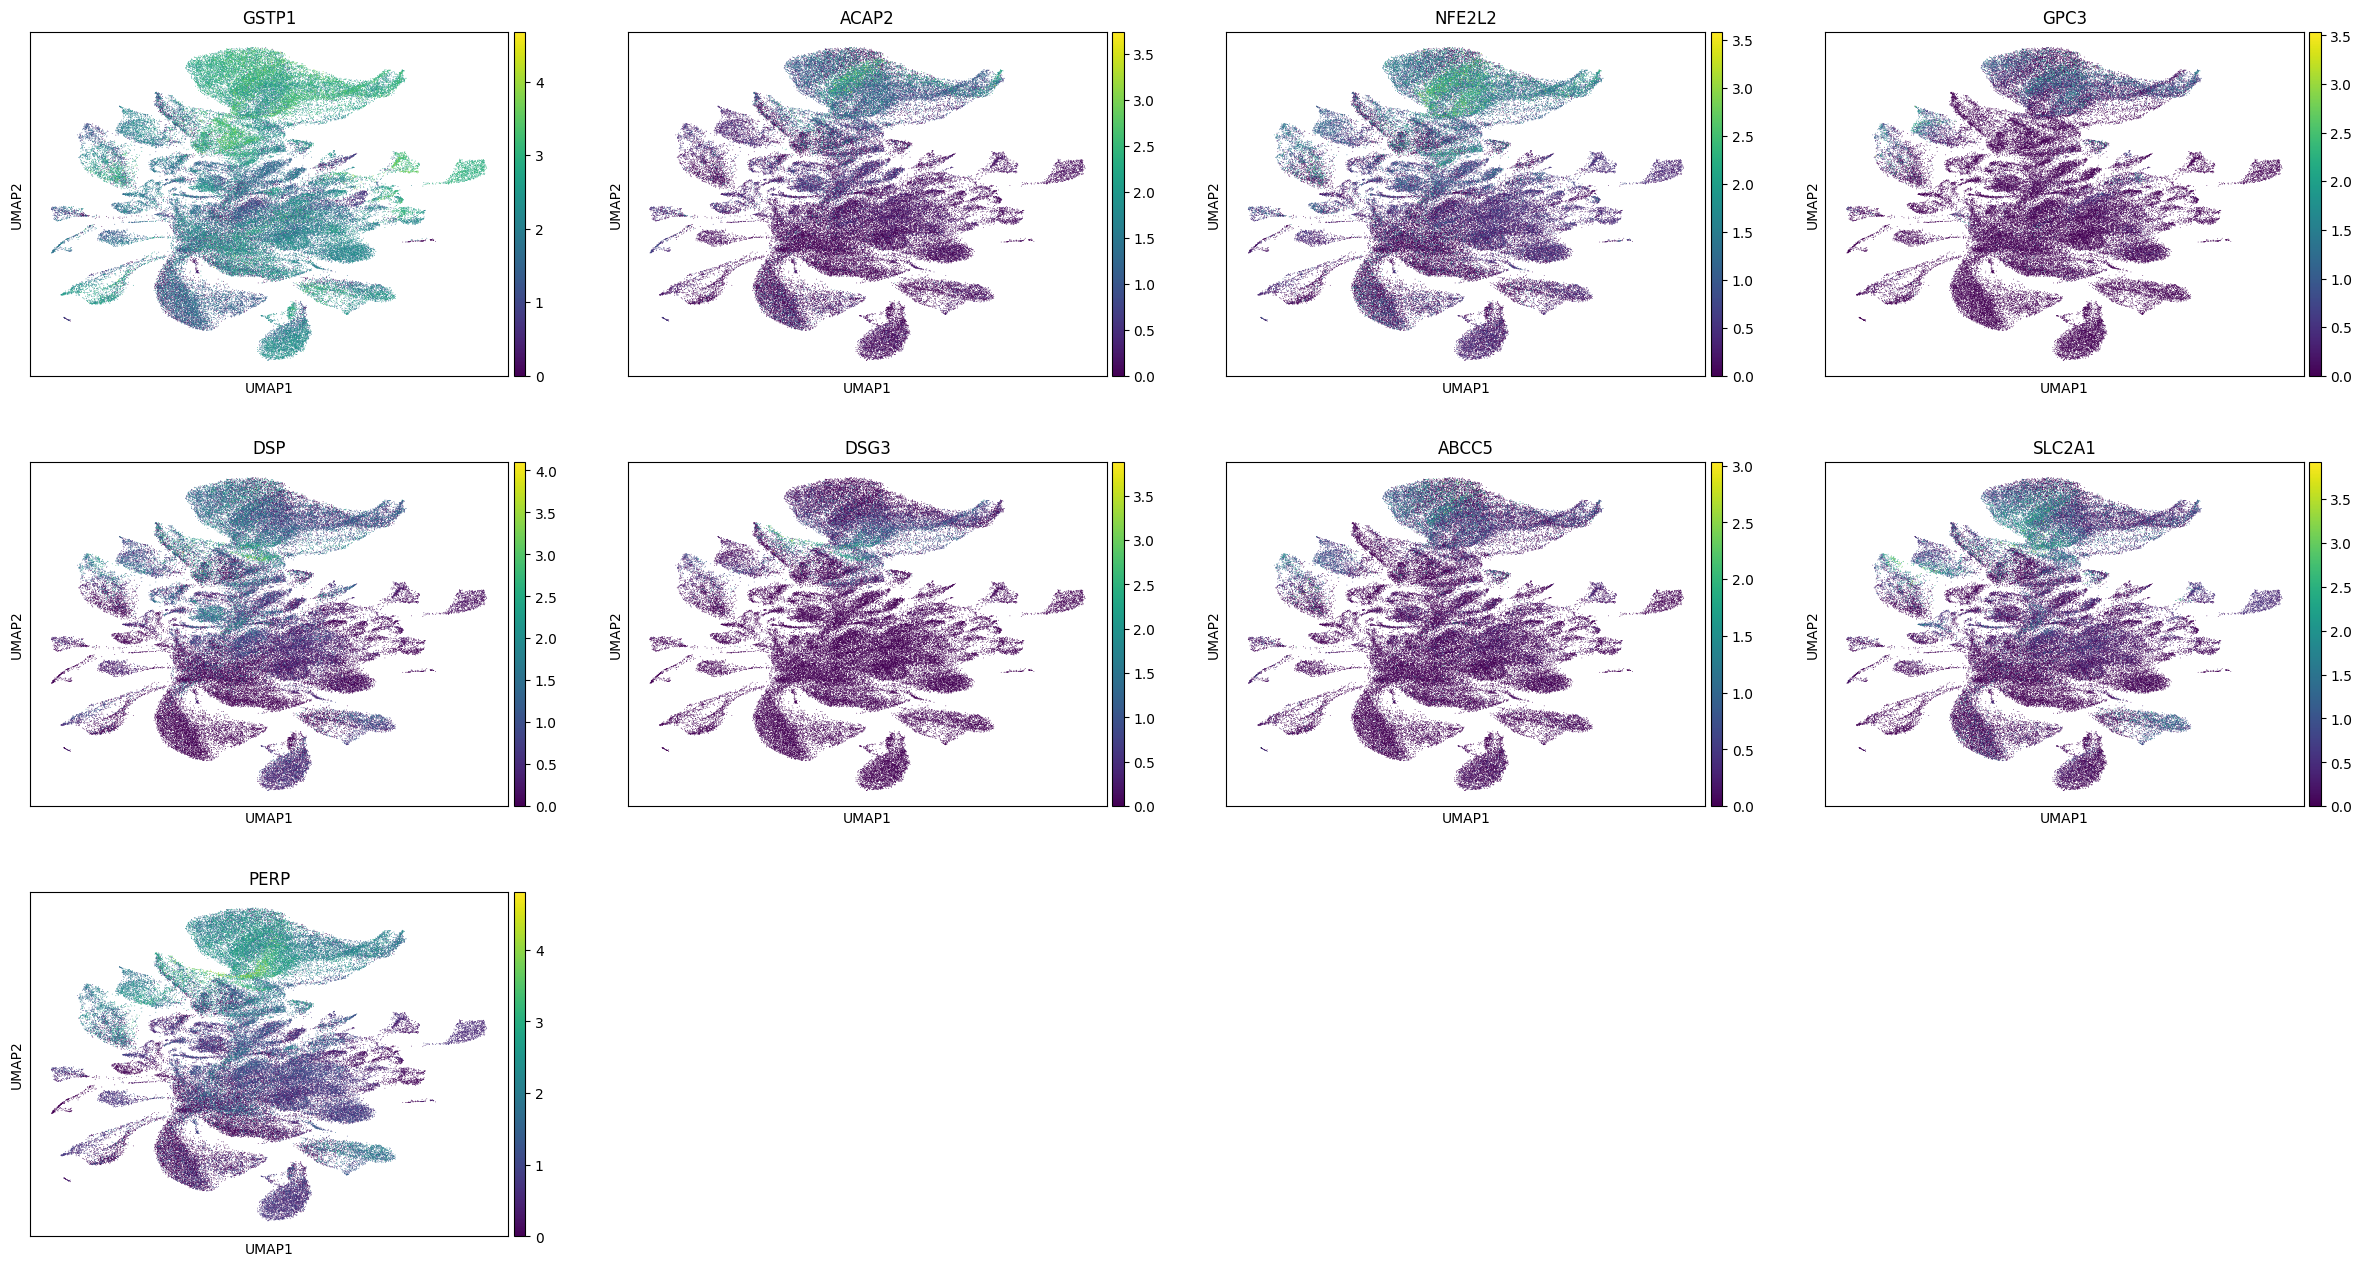

In [19]:
sc.pl.umap(ad,color=['GSTP1','ACAP2','NFE2L2','GPC3','DSP','DSG3','ABCC5','SLC2A1','PERP'])